In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv('bmi_obese.csv')

In [24]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


<AxesSubplot:xlabel='Weight', ylabel='Height'>

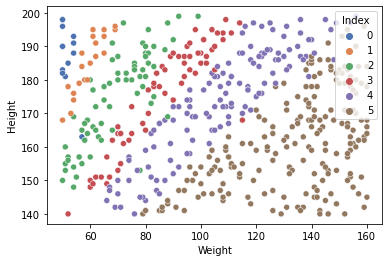

In [25]:
sns.scatterplot(x='Weight',y='Height',data=df,hue='Index', palette="deep")

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['Gender'] = lb_make.fit_transform(df['Gender'])

In [8]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [9]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [13]:
X = df[['Gender', 'Height', 'Weight']]
y= df[['Index']]

In [15]:
from sklearn.model_selection import train_test_split
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy')

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
model.score(X_train,y_train)

1.0

In [19]:
model.score(X_test,y_test)

0.8466666666666667

In [20]:
y_pred=model.predict(X_test)
y_pred


array([5, 3, 4, 1, 5, 4, 5, 1, 4, 5, 5, 3, 5, 4, 3, 4, 2, 5, 5, 3, 3, 4,
       5, 0, 5, 4, 5, 4, 4, 3, 3, 5, 2, 5, 4, 5, 2, 3, 4, 5, 2, 2, 5, 5,
       5, 4, 5, 5, 1, 5, 4, 0, 3, 2, 5, 0, 2, 5, 5, 2, 2, 0, 5, 5, 2, 5,
       3, 5, 4, 3, 5, 4, 5, 5, 5, 5, 5, 1, 3, 5, 5, 5, 3, 4, 2, 5, 4, 5,
       5, 5, 3, 5, 3, 4, 4, 4, 4, 3, 5, 3, 2, 1, 4, 3, 5, 4, 3, 5, 4, 5,
       3, 2, 4, 4, 4, 4, 5, 5, 4, 5, 3, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 1,
       4, 5, 1, 2, 3, 2, 5, 5, 5, 5, 3, 4, 5, 4, 4, 5, 5, 5], dtype=int64)

In [21]:
from  sklearn.metrics import classification_report
from sklearn import metrics
print(f'score={model.score(X_test, y_pred)}')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

score=1.0
[[ 4  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3 14  3  0  0]
 [ 0  0  1 15  4  0]
 [ 0  0  0  5 33  4]
 [ 0  0  0  0  3 57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.57      1.00      0.73         4
           2       0.93      0.70      0.80        20
           3       0.65      0.75      0.70        20
           4       0.82      0.79      0.80        42
           5       0.93      0.95      0.94        60

    accuracy                           0.85       150
   macro avg       0.82      0.86      0.83       150
weighted avg       0.86      0.85      0.85       150

